In [2]:
import pandas as pd

In [6]:
avocado_mean = pd.read_csv("https://stepik.org/media/attachments/lesson/362453/avocado_mean.csv",
                           index_col=0, squeeze=True, parse_dates=['Date'])

In [9]:
avocado_mean = pd.DataFrame(avocado_mean)

Посчитайте скользящее среднее цены авокадо (AveragePrice) с окном равным 3 (window). Чему равно максимальное значение? Ответ округлите до 2 знаков после точки.

In [10]:
avocado_mean

,AveragePrice
Date,
2015-01-04,1.301296
2015-01-11,1.370648
2015-01-18,1.391111
2015-01-25,1.397130
2015-02-01,1.247037
...,...
2018-02-25,1.359630
2018-03-04,1.350185
2018-03-11,1.335093


In [13]:
avocado_mean.AveragePrice.rolling(3).mean().max().round(2)

1.85

Отлично! Помимо авокадо, Толя любит смотреть на графики. Самое время посмотреть, как изменится график в зависимости от выбранного размера окна.

Ваша задача — построить графики скользящего среднего с разными значениями параметра window (2, 4, 10, 50), посмотреть на изменения и соотнести приведенные ниже картинки с соответствующим значением размера окна.

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

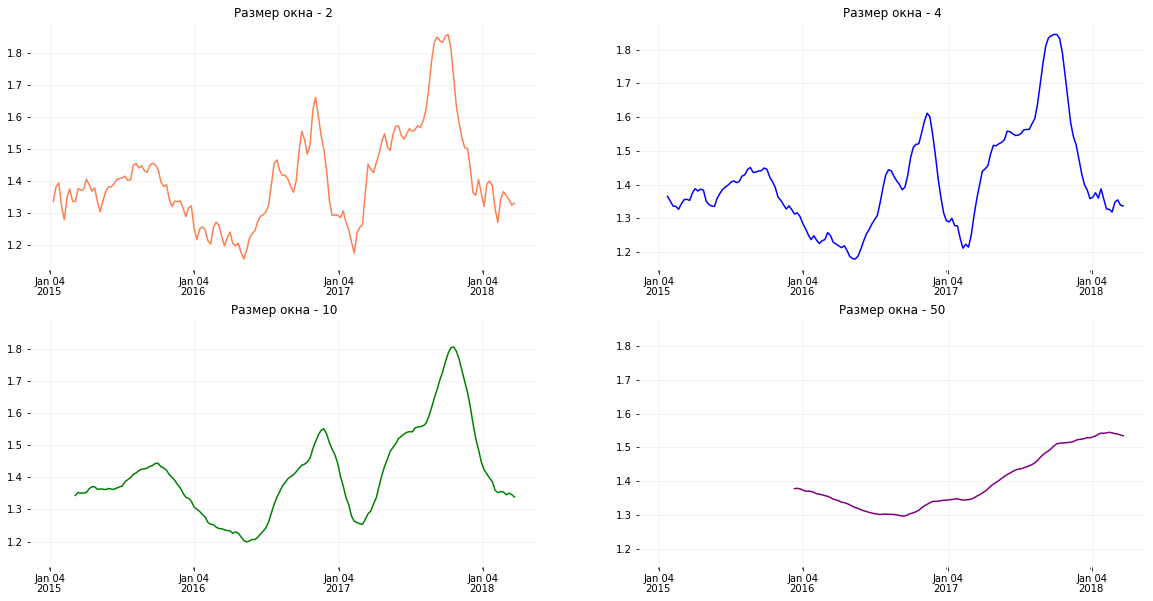

In [18]:
import matplotlib.dates as mdates
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10), sharey='col', sharex=True)
windows = [2, 4, 10, 50]
colors = ['coral', 'blue', 'green', 'purple']

for window, ax, color in zip(windows, axes.flatten(), colors): 
    ax.plot(avocado_mean.rolling(window=window).mean(), label=window, color=color)
for ax in axes.flatten():
    # удаляем рамку
    ax.set_frame_on(False)  
    # устанавливаем major locator – 4 января для каждого года
    ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=1, bymonthday=4))  
    # показывать в формате сокращенного названия месяца и дня (Jan 04)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
    # под major locator - minor locator, т.е. редактируем minor ticks
    ax.xaxis.set_minor_locator(mdates.YearLocator(month=1, day=1))
    # показываем год
    ax.xaxis.set_minor_formatter(mdates.DateFormatter('\n%Y'))
    # делаем сетку графика совсем немного серой и наполовину прозрачной
    ax.grid(True, color='#e2e2e2', alpha=0.5)
for number_of_windows, ax in zip(['2','4','10','50'], axes.flatten()):
    ax.set(title='Размер окна - {}'.format(number_of_windows))
    ax.tick_params(labelbottom=True, which='both')

⭐️Задание со звёздочкой!⭐️

Используйте агрегированные данные о ценах на авокадо и примените функцию ewm() с параметром span=2, чтобы получить экспоненциальное скользящее среднее. Запишите результат в avocado_ewm.

In [25]:
avocado_mean = pd.read_csv('https://stepik.org/media/attachments/lesson/362453/avocado_mean.csv')

In [28]:
avocado_ewm = avocado_mean.ewm(span = 2).mean()

In [29]:
avocado_ewm

,AveragePrice
0,1.301296
1,1.353310
2,1.379480
3,1.391394
4,1.294758
...,...
164,1.356212
165,1.352194
166,1.340793
167,1.322734


In [30]:
avocado_mean = pd.read_csv('https://stepik.org/media/attachments/lesson/362453/avocado_full.csv', index_col=0)


In [32]:
organic_chicago = avocado_mean.query('type == "organic" and region =="Chicago"')

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


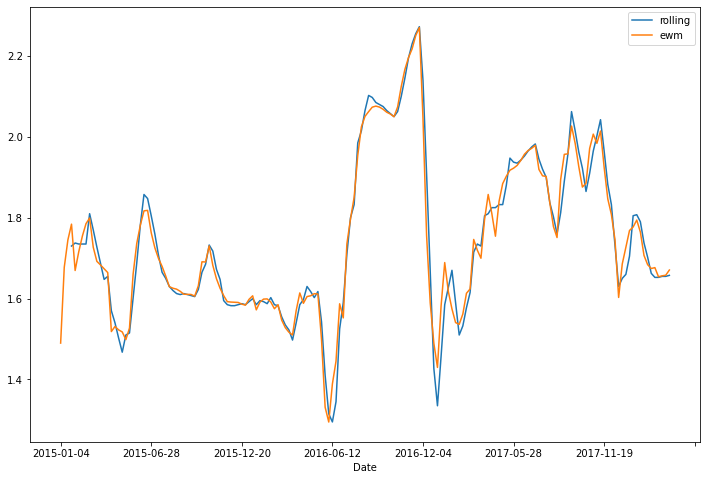

In [35]:
organic_chicago['rolling'] = organic_chicago.AveragePrice.rolling(4).mean()
organic_chicago['ewm'] = organic_chicago.AveragePrice.ewm(span=4).mean()
organic_chicago[['rolling', 'ewm']].plot(figsize = (12,8))

In [39]:
organic_chicago.loc['2016-08-21','rolling'].round(3)

2.102

In [42]:
organic_chicago.loc['2017-02-19','ewm'].round(3)

1.562

Далее будем работать с данными по опозданиям в заключении сделок!

В файле находится информация о том какие компании с кем и на какую сумму заключали сделки, а самое важное – насколько они при этом опоздали. Вот сабсэт данных

Сначала давайте переведём delay в timedelta формат. Обратите внимание, что так просто столбец не переведётся – нужно будет убрать -. Сохраните данные в переменную df, отформатируйте колонку нужным способом (подсказка – уберите -) и переведите её в тип timedelta.

Могут понадобиться:

pd.to_timedelta()
pd.Series.str

In [58]:
df = pd.read_csv('https://stepik.org/media/attachments/course/72204/delays.csv')

In [59]:
df['delay'] = pd.to_timedelta(df.delay.str.replace('-',''))

Время это хорошо, но хотелось бы также разбить его на промежутки. Разбейте время на 3 интервала и поместите соответствующие значения в колонку delay_categorical

In [60]:
df['delay_categorical'] = pd.cut(df.delay, bins = 3)

Разбилось конечно неплохо, но хочется чуть более целые значения и более человеческие названия. В этом нам помогут аргументы функции pd.cut! Перезадайте колонку delay_categorical, чтобы значения в ней были

'less than 1 day' – время от 0 до 1 дня
'1-2 days' – от 1 до 2 дней
'2-3 days' – от 2 до 3 дней
 'more than 3 days' – больше 3 дней

In [61]:
bins = [pd.to_timedelta('0d'),
       pd.to_timedelta('1d'),
       pd.to_timedelta('2d'),
       pd.to_timedelta('3d'),
       pd.to_timedelta('100d')]
labels = ['less than 1 day', '1-2 days', '2-3 days', 'more than 3 days']

In [62]:
df['delay_categorical'] = pd.cut(df.delay, bins = bins, labels = labels)

Прекрасно! Теперь постройте интерактивный барплот с тем, насколько часто задерживаются сделки, и отсортируйте варианты, чтобы снизу был самый редкий, а наверху самый частый.

In [63]:
df

,client_id,company_id,delay,revenue,delay_categorical
0,2389,4240,1 days 14:57:48,705436,1-2 days
1,7614,9544,4 days 02:14:23,859266,more than 3 days
2,2052,2427,0 days 06:08:57,812416,less than 1 day
3,9635,8054,0 days 23:40:19,162312,less than 1 day
4,8154,5503,1 days 13:21:53,658844,1-2 days
...,...,...,...,...,...
259,5837,2617,0 days 05:32:08,602129,less than 1 day
260,2384,2364,3 days 23:27:14,910660,more than 3 days
261,5146,3331,1 days 15:22:34,401137,1-2 days
262,7203,5532,2 days 17:15:02,308979,2-3 days


In [76]:
import plotly.express as px

px.bar(df['delay_categorical'].value_counts())